In [15]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ , QuantumRegister , ClassicalRegister
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-12-03 06:33:52,392: Credentials are already in use. The existing account in the session will be replaced.


In [2]:
from math import *

In [4]:
state = [ 1/sqrt(3) , sqrt(2/3)]
psi = state
display(array_to_latex(psi,prefix="|\\psi\\rangle = "))

<IPython.core.display.Latex object>

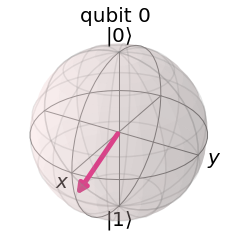

In [6]:
plot_bloch_multivector(psi)

In [7]:
def bellpair(qc, a , b):
    qc.h(a)
    qc.cx(a,b)

In [8]:
def alice(qc, psi , a):
    qc.cx(psi,a)
    qc.h(psi)

In [9]:
def measure_send(qc, a, b):
    qc.barrier()
    qc.measure(a,0)
    qc.measure(b,1)

In [11]:
def bob(qc, qubit , crz ,crx):
    qc.x(qubit).c_if(crx, 1)
    qc.z(qubit).c_if(crz , 1)

In [14]:
qr = QuantumRegister(3)

In [16]:
crx = ClassicalRegister( 1, name = 'crx')
crz = ClassicalRegister( 1 , name = 'crz' )

In [17]:
qc = QuantumCircuit(qr , crx , crz)

In [18]:
qc.initialize(psi,0)
bellpair(qc, 1, 2)

In [19]:
qc.barrier()
alice(qc, 0 , 1)

In [20]:
measure_send(qc, 0, 1)

In [21]:
bob(qc , 2, crz , crx)

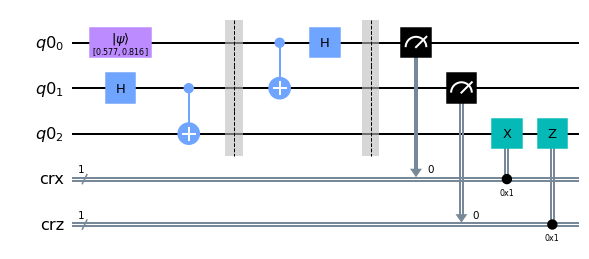

In [22]:
qc.draw()

In [23]:
aer = Aer.get_backend('aer_simulator')
qc.save_statevector()

In [24]:
out_vector = aer.run(qc).result().get_statevector()

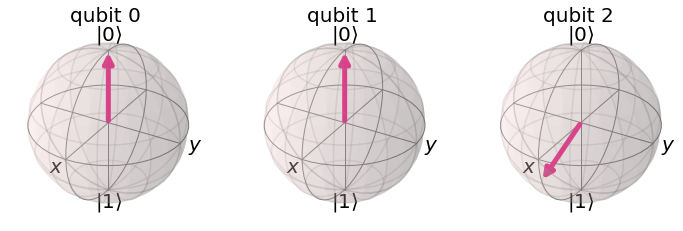

In [25]:
plot_bloch_multivector(out_vector)